In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../../")

import math
import scipy
import torch
import matplotlib.pyplot as plt

import implicitmodules.torch as dm

ImportError: cannot import name 'Model'

In [2]:
source_image = dm.Utilities.load_greyscale_image("../../data/images/bar_a.png", origin='lower')
target_image = dm.Utilities.load_greyscale_image("../../data/images/bar_b.png", origin='lower')

plt.subplot(1, 2, 1)
plt.title("Source image")
plt.imshow(source_image, origin='lower')

plt.subplot(1, 2, 2)
plt.title("Target image")
plt.imshow(target_image, origin='lower')

plt.show()

NameError: name 'dm' is not defined

In [3]:
sig_smooth = 15
im0 = torch.tensor(scipy.ndimage.gaussian_filter(source_image, sig_smooth))
im1 = torch.tensor(scipy.ndimage.gaussian_filter(target_image, sig_smooth))

In [4]:
center = torch.tensor([[55., 85.]])

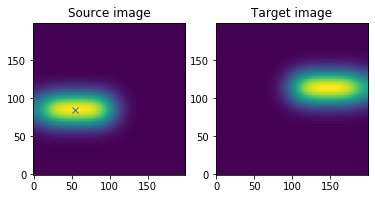

In [5]:
%matplotlib inline

plt.subplot(1, 2, 1)
plt.title("Source image")
plt.imshow(im0, origin='lower')
plt.plot(center[0, 0].numpy(), center[0, 1].numpy(), 'x')

plt.subplot(1, 2, 2)
plt.title("Target image")
plt.imshow(im1, origin='lower')

plt.show()

In [6]:
translation = dm.DeformationModules.ImplicitModule0(2, 1, 200., nu=0.1, gd=center.clone().requires_grad_())

In [ ]:
dm.Models.

In [8]:
model = dm.Models.ModelImageRegistration(im0, [translation], dm.Attachment.EuclideanPointwiseDistanceAttachment(), fit_gd=[True], lam=100.)

[autoreload of implicitmodules.torch.Models failed: Traceback (most recent call last):
  File "/usr/lib/python3/dist-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
ImportError: cannot import name 'Model'
]


AttributeError: module 'implicitmodules.torch.Models' has no attribute 'ModelImageRegistration'

In [22]:
shoot_solver='rk4'
shoot_it = 10

costs = {}
fitter = dm.Models.Fitter(model, optimizer='torch_lbfgs')

In [23]:
fitter.fit(im1.clone(), 100, costs=costs, options={'shoot_it': shoot_it, 'line_search_fn': 'strong_wolfe'})

Starting optimization with method torch LBFGS
Initial cost={'deformation': 0.0, 'attach': 23384.3359375, 'total': 23384.3359375}
Time: 15.872323132003658
Iteration: 0
Costs
deformation=4931.486328125
attach=6352.5556640625
total=11284.0419921875
Time: 23.355656725994777
Iteration: 1
Costs
deformation=4931.451171875
attach=6352.5888671875
total=11284.0400390625
Time: 26.843750615997124
Iteration: 2
Costs
deformation=4931.451171875
attach=6352.5888671875
total=11284.0400390625
Optimisation process exited with message: Convergence achieved.
Final cost=11284.0400390625
Model evaluation count=45
Time elapsed = 26.84398826499819


In [33]:
with torch.autograd.no_grad():
    deformed_image = model.compute_deformed(shoot_solver, shoot_it)

translation_center = model.init_manifold[1].gd.detach().flatten().tolist()
translation_moment = model.init_manifold[1].cotan.detach().flatten().tolist()

print(translation_center)
print(translation_moment)

[54.999786376953125, 84.99981689453125]
[0.001022495562210679, 0.003029131330549717]


In [35]:
# Get final geometrical descriptors
from implicitmodules.torch.DeformationModules import CompoundModule
from implicitmodules.torch.HamiltonianDynamic import shoot, Hamiltonian
compound = CompoundModule(model.modules)
compound.manifold.fill_gd([manifold.gd for manifold in model.init_manifold])
compound.manifold.fill_cotan([manifold.cotan for manifold in model.init_manifold])

# # Forward shooting
shoot(Hamiltonian(compound), shoot_solver, shoot_it)

deformed_translation_center = compound.manifold.gd[1][0].detach()
print(deformed_translation_center)

tensor([ 84.5926, 174.9274])


In [25]:
from implicitmodules.torch.Utilities import sample_from_greyscale, deformed_intensities, AABB
from implicitmodules.torch.DeformationModules import SilentLandmarks, CompoundModule

# Prepare for reverse shooting
compound.manifold.negate_cotan()
pixels = AABB(0., self.__image_resolution[0], 0., self.__image_resolution[1]).fill_count(self.__image_resolution)
silent = SilentLandmarks(2, pixels.shape[0], gd=pixels)
compound = CompoundModule([silent, *compound.modules])

shoot(Hamiltonian(compound), solver, it)

NameError: name 'self' is not defined

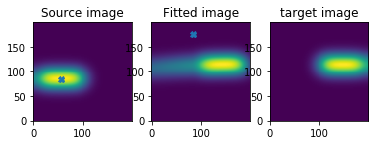

In [36]:
%matplotlib inline
plt.subplot(1, 3, 1)
plt.title("Source image")
plt.imshow(im0, origin='lower')
plt.plot(center.flatten().tolist()[0], center.flatten().tolist()[1], 'X')
#plt.plot(translation_center[0], translation_center[1], 'X')
#plt.quiver(translation_center[0], translation_center[1],
#           translation_moment[0], translation_moment[1])

plt.subplot(1, 3, 2)
plt.title("Fitted image")
plt.imshow(deformed_image, origin='lower')
plt.plot(deformed_translation_center[0], deformed_translation_center[1], 'X')

plt.subplot(1, 3, 3)
plt.title("target image")
plt.imshow(im1, origin='lower')

plt.show()

In [34]:
im0.shape

torch.Size([200, 200])

In [11]:
from implicitmodules.torch.Utilities import sample_from_greyscale, deformed_intensities

In [12]:
source_pos, source_weight = sample_from_greyscale(im0, 0., centered=False, normalise_weights=False, normalise_position=False)

In [13]:
im02 = deformed_intensities(source_pos, source_weight.view(im0.shape))

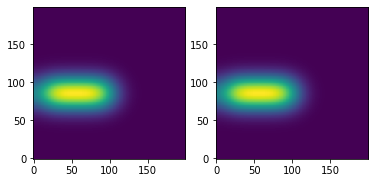

In [14]:

plt.subplot(1, 2, 1)
plt.imshow(im0, origin='lower')

plt.subplot(1, 2, 2)
plt.imshow(im02, origin='lower')

plt.show()